In [26]:
#(1b):

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("/Users/m.sushanthreddy/Downloads/hamspam.csv.csv")

df['Contains Link'] = df['Contains Link'].map({'Yes': 1, 'No': 0})
df['Contains Money Words'] = df['Contains Money Words'].map({'Yes': 1, 'No': 0})
df['Length'] = df['Length'].map({'Long': 1, 'Short': 0})
df['Class'] = df['Class'].map({'Spam': 1, 'Ham': 0})


X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naïve Bayes Classifier Results:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classifier Results:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")


Naïve Bayes Classifier Results:
              precision    recall  f1-score   support

           0       0.53      0.83      0.65       103
           1       0.55      0.23      0.32        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.48       200
weighted avg       0.54      0.54      0.49       200

Accuracy: 0.5350

KNN Classifier Results:
              precision    recall  f1-score   support

           0       0.53      0.77      0.62       103
           1       0.52      0.27      0.35        97

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.53      0.49       200

Accuracy: 0.5250


/Users/m.sushanthreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


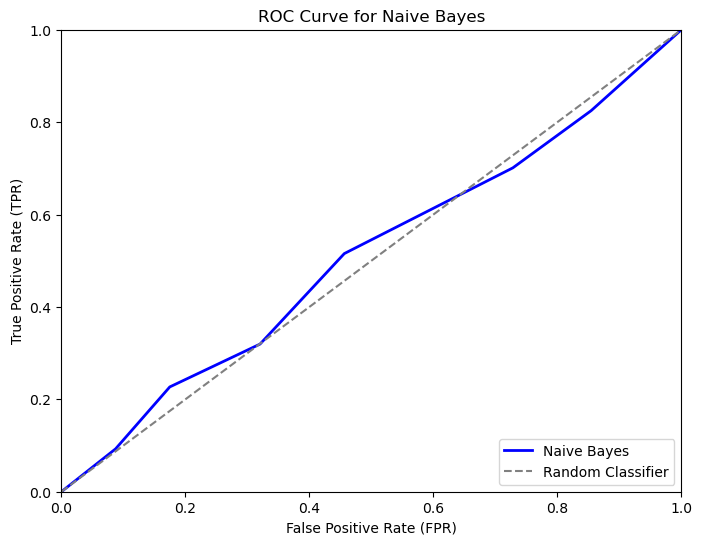

AUC Score: 0.51


In [20]:
#(2b):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/Users/m.sushanthreddy/Downloads/hamspam.csv.csv")

X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

X = X.apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

nb_scores = nb_classifier.predict_proba(X_test)[:, 1]
knn_scores = knn_classifier.predict_proba(X_test)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_scores)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label= 'Random Classifier' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc_nb:.2f}")

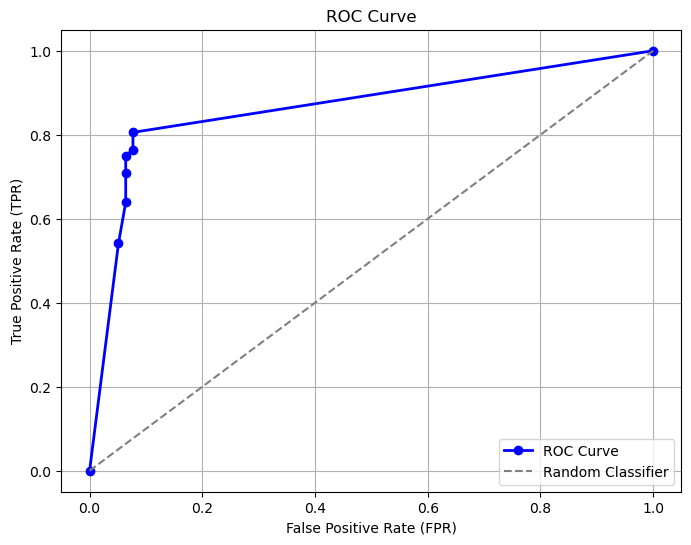

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


roc_df = pd.read_csv("/Users/m.sushanthreddy/Downloads/roc_data.csv")

thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

tpr_values = [0]
fpr_values = [0]

for threshold in thresholds:
    roc_df['Predicted_Label'] = (roc_df['Prediction'] >= threshold).astype(int)
    
    TP = np.sum((roc_df['Predicted_Label'] == 1) & (roc_df['True_Label'] == 1))
    FP = np.sum((roc_df['Predicted_Label'] == 1) & (roc_df['True_Label'] == 0))
    FN = np.sum((roc_df['Predicted_Label'] == 0) & (roc_df['True_Label'] == 1))
    TN = np.sum((roc_df['Predicted_Label'] == 0) & (roc_df['True_Label'] == 0))
    
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    
    tpr_values.append(TPR)
    fpr_values.append(FPR)


tpr_values.append(1)
fpr_values.append(1)


roc_results_df = pd.DataFrame({
    'Threshold': [None] + thresholds + [None],
    'TPR (Sensitivity)': tpr_values,
    'FPR (Fall-out)': fpr_values
})


plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker = 'o', linestyle='-', color='b', lw=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()